# Alternative Models: Eager Learners

<hr>

* Logistic Regression
* Support Vector Machine
* Decision Trees

In [1]:
# Import needed libraries and modules
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import roc_auc_score, accuracy_score
import torch
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn import tree

# Fetch dataset from UCI Repository
from ucimlrepo import fetch_ucirepo
heart_disease = fetch_ucirepo(id=45)
df = heart_disease.data.original

In [2]:
# ---------------------------------------------------------------------------- #
#                                PRE-PROCESSING                                #
# ---------------------------------------------------------------------------- #

# --------------------------------- SETTINGS --------------------------------- #
Normalize = True
PC_Features = True
Test_Size = 0.2
Random_Seed = 82024
Torch = False
Cross_Validation = True

# Drop missing values
df = df.dropna()
df = df.reset_index(drop=True)

# Binarize target
df.loc[df['num'] != 0, 'num'] = 1

# Define features and target vectors
X = df.iloc[:,:-1]
y = df['num']

# Normalize if requested
if (Normalize) or (PC_Features):
    int_features, cat_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak'],\
    ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
    
    preprocessor = ColumnTransformer(
    transformers=[
        ('int', StandardScaler(), int_features),
        ('cat', OneHotEncoder(), cat_features)
    ])
    X = preprocessor.fit_transform(X)
else:
    X = X.values

# Apply PCA if requested
if PC_Features:
    pca = PCA(n_components=12)
    X = pca.fit_transform(X)

# Split train and test data
index = list(range(y.size))
train_index, test_index = train_test_split(index, test_size=Test_Size, random_state=Random_Seed)

train_X = X[train_index]
train_y = y.loc[train_index].values

test_X = X[test_index]
test_y = y.loc[test_index].values

# Convert to torch tensor if requested
if Torch:
    train_X, train_y, test_X, test_y = torch.tensor(train_X),\
    torch.tensor(train_y).double(), torch.tensor(test_X), torch.tensor(test_y).double()

<hr>

## Logistic Regression:

In [3]:
# ---------------------------------------------------------------------------- #
#                                     MODEL                                    #
# ---------------------------------------------------------------------------- #

# Create model
model = LogisticRegression(random_state=Random_Seed)

if Cross_Validation:
    cv_results = cross_validate(model, X, y, scoring=['accuracy', 'roc_auc'])
    acc = cv_results['test_accuracy'].mean()
    roc_auc = cv_results['test_roc_auc'].mean()
else:
    # Train model
    model.fit(train_X, train_y)

    # Test model
    y_pred = model.predict(test_X)
    pred_probs = model.predict_proba(test_X)

    # Evaluation
    acc = accuracy_score(test_y, y_pred)
    roc_auc = roc_auc_score(test_y, pred_probs[:, 1])

print(f"Accuracy: {acc:.2f}")
print(f"AUC-ROC: {roc_auc:.2f}")

Accuracy: 0.84
AUC-ROC: 0.92


<hr>

## Support Vector Machines:

Suport Vector Machines(SVMs) are machine learning algorithms that work by finding a hyperplane to separate data into classes

**The advantages of support vector machines are:**

* Effective in high dimensional spaces.

* Still effective in cases where number of dimensions is greater than the number of samples.

* Uses a subset of training points in the decision function (called support vectors), so it is also memory efficient.

* Versatile: different Kernel functions can be specified for the decision function as in Gaussian Process Models.

**The disadvantages of support vector machines include:**

* If the number of features is much greater than the number of samples, avoid over-fitting in choosing Kernel functions and regularization term is crucial.

* SVMs do not directly provide probability estimates.

### SVC classification SVM implementation:

In [4]:
# ---------------------------------------------------------------------------- #
#                                     MODEL                                    #
# ---------------------------------------------------------------------------- #

# Create model
model = svm.SVC(random_state=Random_Seed, probability=True)

if Cross_Validation:
    cv_results = cross_validate(model, X, y, scoring=['accuracy', 'roc_auc'])
    acc = cv_results['test_accuracy'].mean()
    roc_auc = cv_results['test_roc_auc'].mean()
else:
    # Train model
    model.fit(train_X, train_y)

    # Test model
    y_pred = model.predict(test_X)
    pred_probs = model.predict_proba(test_X)

    # Evaluation
    acc = accuracy_score(test_y, y_pred)
    roc_auc = roc_auc_score(test_y, pred_probs[:, 1])

print(f"Accuracy: {acc:.2f}")
print(f"AUC-ROC: {roc_auc:.2f}")

Accuracy: 0.83
AUC-ROC: 0.90


### NuSVC classification SVM implementation:

In [5]:
# ---------------------------------------------------------------------------- #
#                                     MODEL                                    #
# ---------------------------------------------------------------------------- #

# Create model
model = svm.NuSVC(random_state=Random_Seed, probability=True)

if Cross_Validation:
    cv_results = cross_validate(model, X, y, scoring=['accuracy', 'roc_auc'])
    acc = cv_results['test_accuracy'].mean()
    roc_auc = cv_results['test_roc_auc'].mean()
else:
    # Train model
    model.fit(train_X, train_y)

    # Test model
    y_pred = model.predict(test_X)
    pred_probs = model.predict_proba(test_X)

    # Evaluation
    acc = accuracy_score(test_y, y_pred)
    roc_auc = roc_auc_score(test_y, pred_probs[:, 1])

print(f"Accuracy: {acc:.2f}")
print(f"AUC-ROC: {roc_auc:.2f}")

Accuracy: 0.83
AUC-ROC: 0.90


### LinearSVC classification SVM implementation:

In [6]:
# ---------------------------------------------------------------------------- #
#                                     MODEL                                    #
# ---------------------------------------------------------------------------- #

# Create model
model = svm.LinearSVC(random_state=Random_Seed, dual=False)

if Cross_Validation:
    cv_results = cross_validate(model, X, y, scoring=['accuracy', 'roc_auc'])
    acc = cv_results['test_accuracy'].mean()
    roc_auc = cv_results['test_roc_auc'].mean()
else:
    # Train model
    model.fit(train_X, train_y)

    # Test model
    y_pred = model.predict(test_X)
    # This module does not have a manual way to access probability
    # pred_probs = model.predict_proba(test_X)

    # Evaluation
    acc = accuracy_score(test_y, y_pred)
    # roc_auc = roc_auc_score(test_y, pred_probs[:, 1])

print(f"Accuracy: {acc:.2f}")
print(f"AUC-ROC: {roc_auc:.2f}")

Accuracy: 0.84
AUC-ROC: 0.92


<hr>

## Decision Tree:

Accuracy: 0.75
AUC-ROC: 0.74


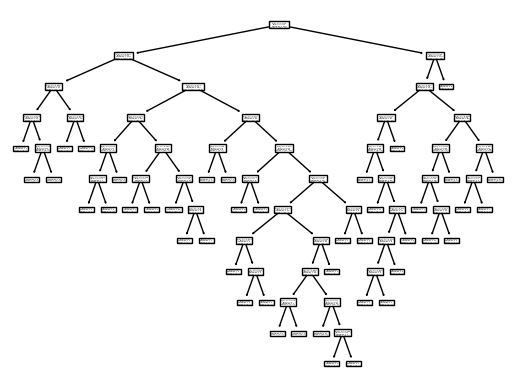

In [7]:
# ---------------------------------------------------------------------------- #
#                                     MODEL                                    #
# ---------------------------------------------------------------------------- #

# Create model
model = tree.DecisionTreeClassifier(random_state=Random_Seed)

if Cross_Validation:
    cv_results = cross_validate(model, X, y, scoring=['accuracy', 'roc_auc'])
    acc = cv_results['test_accuracy'].mean()
    roc_auc = cv_results['test_roc_auc'].mean()
else:
    # Train model
    model.fit(train_X, train_y)

    # Test model
    y_pred = model.predict(test_X)
    pred_probs = model.predict_proba(test_X)

    # Evaluation
    acc = accuracy_score(test_y, y_pred)
    roc_auc = roc_auc_score(test_y, pred_probs[:, 1])

print(f"Accuracy: {acc:.2f}")
print(f"AUC-ROC: {roc_auc:.2f}")

model.fit(X, y)
plot = tree.plot_tree(model)

### References:
* https://scikit-learn.org/stable/modules/svm.html
* https://scikit-learn.org/stable/modules/tree.html
* https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html